In [11]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('ResumeDataSet.csv')

In [14]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [15]:
df.shape

(962, 2)

In [16]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

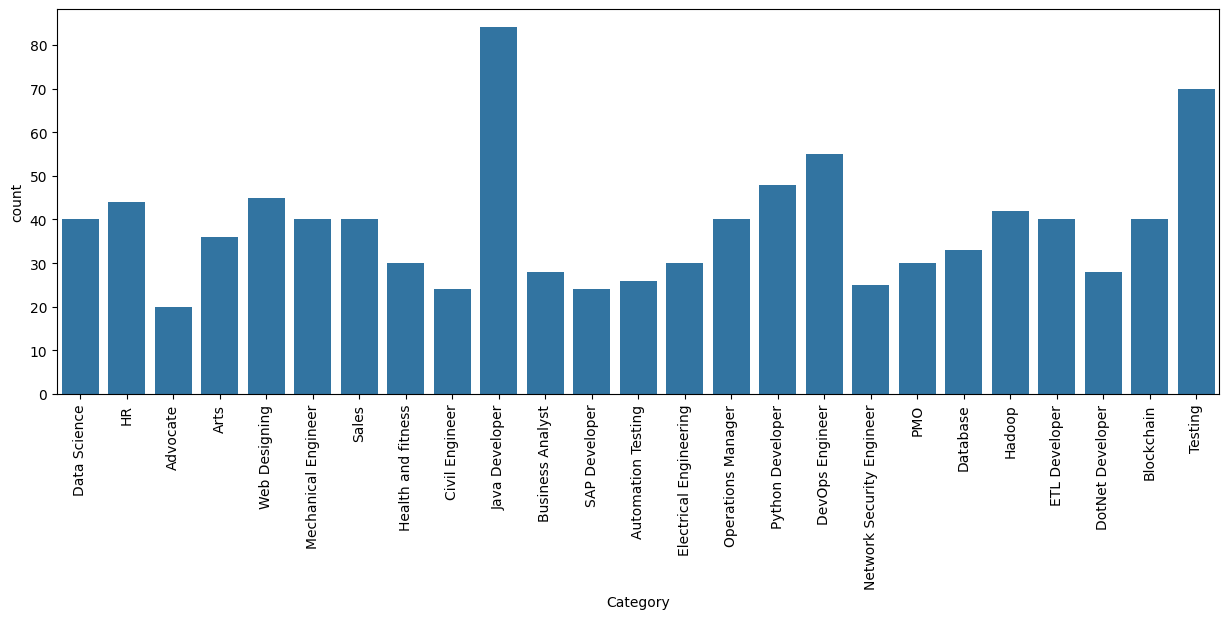

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

In [36]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7875/1096189204.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
/tmp/ipykernel_7875/1096189204.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
/tmp/ipykernel_7875/1096189204.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
/tmp/ipykernel_7875/1096189204.py:7: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub('[%s]' % re.escape

In [19]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/b7/ee35904c07a0666784349529412fbb9814a56382b650d30fd9d6be5e5054/scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/08/77/f90f7306d755ac68bd159c50bb86fffe38400e533e8c609dd8484bd0f172/scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 381.6 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [21]:
# (['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
reqText = tfidf.transform(df['Resume'])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(reqText,df['Category'], test_size=0.33, random_state=42)

Accuracy :  0.9874213836477987
Precision: 0.9891334730957372
Recall: 0.9874213836477987
F1 Score: 0.987439394824464
Specificity for each class: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9967637540453075, 1.0, 0.9935064935064936, 1.0, 1.0, 0.9967741935483871]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      0.83      0.91        12
           7       1.00      1.00      1.00         9
           8       1.00      0.90      0.95        21
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00   

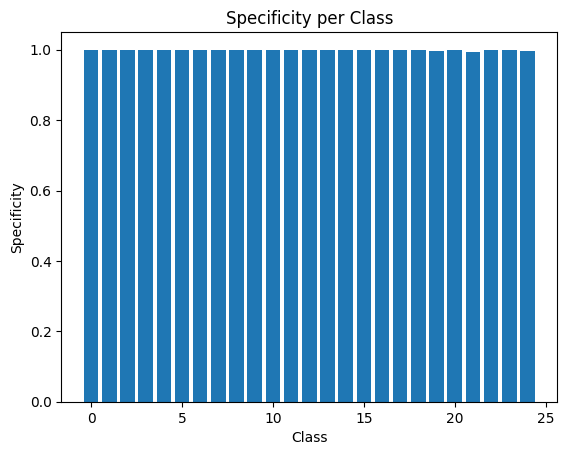

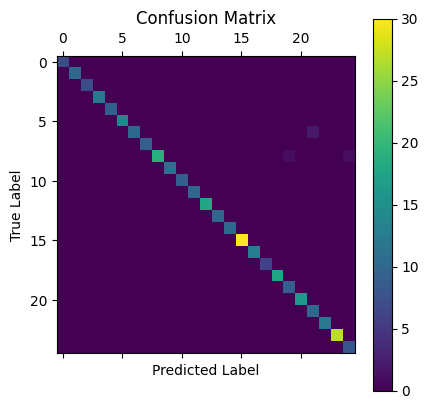

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
clf = OneVsRestClassifier(KNeighborsClassifier())

# Fit the classifier to the training data
clf.fit(X_train, y_train) 

# Predict using the trained classifier
ypredict = clf.predict(X_test)

# Print the predicted values
print("Accuracy : ",accuracy_score(y_test, ypredict))

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall and F1 score
precision = precision_score(y_test, ypredict, average='weighted')
recall = recall_score(y_test, ypredict, average='weighted')
f1 = f1_score(y_test, ypredict, average='weighted')  

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate specificity for each class
cm = confusion_matrix(y_test, ypredict)

specificity_per_class = []
for i in range(len(cm)):
    tn = sum([cm[j][k] for j in range(len(cm)) if j != i for k in range(len(cm)) if k != i])
    fp = sum(cm[j][i] for j in range(len(cm)) if j != i)
    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)
    
print("Specificity for each class:", specificity_per_class)

from sklearn.metrics import classification_report
print(classification_report(y_test, ypredict))

print("Confusion Matrix:")
print(confusion_matrix(y_test, ypredict))

import matplotlib.pyplot as plt

plt.bar(range(len(specificity_per_class)), specificity_per_class)
plt.title("Specificity per Class")
plt.xlabel("Class")
plt.ylabel("Specificity")
plt.show()

plt.matshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")  
plt.xlabel("Predicted Label")
plt.show()

# Accuracy :  0.9874213836477987
# Precision: 0.9891334730957372
# Recall: 0.9874213836477987
# F1 Score: 0.987439394824464


In [26]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))                      